# Preparing the environment

## Graphics and plotting

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [2]:
import seaborn as sea

## SQL database connection

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code:

In [3]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement!

In [4]:
%sql postgresql://chrble@/s_cerevisiae

u'Connected: chrble@s_cerevisiae'

# Exploration of the Interactome *S. Cerevisiae* data set

The `y2h_union` table lists interacting proteins (by name); a pair *(proteinA, proteinB)* appears in the table if *proteinA* interacts with *proteinB*.  Note that the "interacts with" relation need not be symmetric!

This describes a *directed* graph, where the proteins are the vertices and each interaction defines an edge.

Let us have a look at the `y2h_union` table:

In [7]:
%sql select * from y2h_union limit 3;

3 rows affected.


symbol_a,symbol_b
Q0085,YCR106W
TORF1,YCR106W
TORF19,YDR361C


Alternatively, one can load the data from the `Y2H_union.tsv` file using only Python functions:

In [5]:
data = []
with open('Y2H_union.tsv', 'r') as stream:
    for line in stream:
        data.append(line.split())

In [6]:
data[:3]

[['MEL1', 'YJL092W'], ['Q0085', 'YCR106W'], ['TORF1', 'YCR106W']]

----

*Each of the following questions admit a solution using an algorithm in Python, or just an SQL query.*

Use whichever suits you best.

## 1. How can you compute the "in-degree" of a given vertex?

In [14]:
from collections import defaultdict
count_in= defaultdict(int)
for start,end in data:
    count_in[end]+=1
    
print sorted(count_in.items(),key=lambda x:x[1],reverse=True)[:10]

[('YNL189W', 66), ('YLR423C', 61), ('YLR291C', 55), ('YPL070W', 27), ('YPL094C', 26), ('YIR038C', 26), ('YPL049C', 25), ('YML051W', 19), ('YML064C', 16), ('YOR284W', 15)]


## 2. How can you compute the "out-degree" of a given vertex?

In [13]:
count_out= defaultdict(int)
for start,end in data:
    count_out[start]+=1
    
print sorted(count_out.items(),key=lambda x:x[1],reverse=True)[:10]

[('YBR261C', 38), ('YLR291C', 36), ('YDR510W', 31), ('YDR479C', 29), ('YDL100C', 28), ('YIR038C', 26), ('YDR100W', 26), ('YAR027W', 25), ('YDL239C', 22), ('YLR423C', 21)]


## 3. How can you compute the degree (i.e., regardless of direction) of a given vertex

In [15]:
count= defaultdict(int)
for start,end in data:
    count[start]+=1
    count[end]+=1
    
print sorted(count.items(),key=lambda x:x[1],reverse=True)[:10]

[('YLR291C', 91), ('YLR423C', 82), ('YNL189W', 81), ('YIR038C', 52), ('YDR510W', 46), ('YBR261C', 42), ('YDR479C', 37), ('YDR100W', 32), ('YPL070W', 30), ('YDL100C', 29)]


## 4. How can you compute the vertex degree distribution?

In [21]:
from __future__ import division
dist=defaultdict(list)
for vertex,degree in count.items():
    dist[degree].append(vertex)

In [24]:
y=[]
x=[]
for num,v_list in dist.items():
    x.append(num)
    y.append(len(v_list)/len(count))

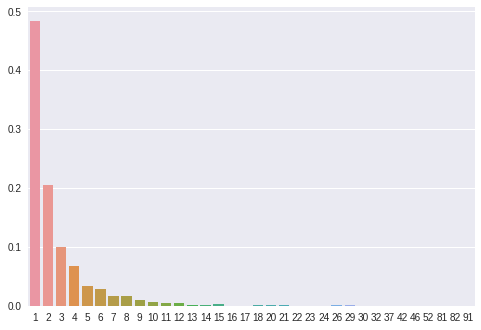

In [23]:
sea.barplot(x,y)